<a href="https://colab.research.google.com/github/ibnuazman/DeepLearningWorkshop/blob/main/Assessment1_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assessment 1: Deep Learning**

1) Answer all questions.
2) This assessment is open-book. You are allowed to refer to any references including online materials, books, notes, codes, github links, etc.
3) Copy this notebook to your google drive (click **FILE** > **save a copy in Drive**)
4) Upload the answer notebook to your github. 
5) Submit the assessment by sharing the link to your answer notebook. 





### **QUESTION 1** 

One day while wandering around a clothing store at KL East Mall, you stumbled upon a pretty girl who is choosing a dress for Hari Raya. It turns out that the girl is visually impaired and had a hard time distinguishing between an abaya and a kebaya. To help people with the similar situation, you then decided to develop an AI system to identify the type of clothes using a Convolutional Neural Networks (ConvNet). In order to train the network, you decide to use the Fashion MNIST dataset which is freely available on Pytorch.


#### a) Given the problem, what is the most appropriate loss function to use? Justify your answer. **[5 marks]**

***The most approriate loss function to use is Cross-Entropy Loss. This loss function is more suitable for classification problem like this problem. The loss/error is measured by 0 until 1. The closer to 0, the more accuracy for the model. Cross-Entropy loss measures the difference between the discovered probability distribution of a machine learning classification model and the predicted distribution.***

#### b) Create and train a ConvNet corresponding to the following CNN architecture (with a modification of the final layer to address the number of classes). Please include **[10 marks]**:

    1) The dataloader to load the train and test datasets.

    2) The model definition (either using sequential method OR pytorch class method).

    3) Define your training loop.

    4) Output the mean accuracy for the whole testing dataset.

    

<div>
<img src="https://vitalflux.com/wp-content/uploads/2021/11/VGG16-CNN-Architecture.png" width="550"/>
</div>


In [ ]:
import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import glob
import numpy
import random

from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from torchsummary import summary


###############################################
######## THE REST OF YOUR CODES HERE ##########
###############################################

In [ ]:
# Applying Transforms to the Data
import torchvision
import torchvision.transforms as transforms

image_transforms = {
    'train': transforms.Compose([
        transforms.Resize((32,32)),
        transforms.ToTensor(),
        transforms.Normalize([0.485],
                             [0.229])
    ]),
    'test': transforms.Compose([
        transforms.Resize((32,32)),
        transforms.ToTensor(),
        transforms.Normalize([0.485],
                             [0.229])
    ])
}


**1) The dataloader to load the train and test datasets.**

In [ ]:
batch_size = 32

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, 
                                             download=True, transform=image_transforms['train'])
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                          shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, 
                                            download=True, transform=image_transforms['test'])
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, 
                                         shuffle=False)

train_data_size = len(trainloader.dataset)
test_data_size = len(testloader.dataset)

print(train_data_size)
print(test_data_size)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

60000
10000


In [ ]:
trainset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.485], std=[0.229])
           )

In [ ]:
testset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.485], std=[0.229])
           )

**2) The model definition (either using sequential method OR pytorch class method).**

In [ ]:
class myModel(nn.Module):
  def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(32 *6 * 6, 48)
        self.fc2 = nn.Linear(48, 10)
        self.relu = nn.ReLU()
  
  def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        #print(x.shape)
        x = x.view(-1,32 *6 * 6)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = myModel()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

myModel(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1152, out_features=48, bias=True)
  (fc2): Linear(in_features=48, out_features=10, bias=True)
  (relu): ReLU()
)

**3) Define your training loop.**

In [ ]:
import time # to calculate training time

def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    
    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        # Set to training mode
        model.train()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(trainloader):

            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Clean existing gradients
            optimizer.zero_grad()
            
            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            
            # Compute loss
            loss = loss_criterion(outputs, labels)
            
            # Backpropagate the gradients
            loss.backward()
            
            # Update the parameters
            optimizer.step()
            
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

            
        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(testloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
            
        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_test_loss = valid_loss/test_data_size 
        avg_test_acc = valid_acc/test_data_size

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_test_loss, avg_test_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        torch.save(model, 'cifar10_model_'+str(epoch)+'.pt')
            
    return model, history

In [ ]:
num_epochs = 10
trained_model, history = train_and_validate(model, criterion, optimizer, num_epochs)

Epoch: 1/10
Epoch : 000, Training: Loss: 0.7407, Accuracy: 73.2633%, 
		Validation : Loss : 0.5404, Accuracy: 79.4900%, Time: 18.4534s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.4557, Accuracy: 83.5850%, 
		Validation : Loss : 0.4369, Accuracy: 84.0300%, Time: 18.1425s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.3966, Accuracy: 85.6350%, 
		Validation : Loss : 0.4104, Accuracy: 85.2000%, Time: 18.1835s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.3650, Accuracy: 86.6883%, 
		Validation : Loss : 0.3832, Accuracy: 86.1700%, Time: 18.0605s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.3410, Accuracy: 87.5183%, 
		Validation : Loss : 0.3498, Accuracy: 87.3300%, Time: 18.0042s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.3222, Accuracy: 88.3483%, 
		Validation : Loss : 0.3415, Accuracy: 87.6300%, Time: 18.7310s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.3065, Accuracy: 88.7900%, 
		Validation : Loss : 0.3498, Accuracy: 86.6400%, Time: 17.9833s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.2937, Accura

#### c) Replace your defined CNN in b) with a pre-trained model. Then, proceed with a transfer learning and finetune the model for the Fashion MNIST dataset. **[10 marks]**

In [ ]:
image_transforms = {
    'train': transforms.Compose([
        transforms.Resize((32,32)),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.size(0)==1 else x),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
    'test': transforms.Compose([
        transforms.Resize((32,32)),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.size(0)==1 else x),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
}

In [ ]:
batch_size = 32

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, 
                                             download=True, transform=image_transforms['train'])
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                          shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, 
                                            download=True, transform=image_transforms['test'])
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, 
                                         shuffle=False)

train_data_size = len(trainloader.dataset)
test_data_size = len(testloader.dataset)

print(train_data_size)
print(test_data_size)

60000
10000


In [ ]:
###############################################
###############YOUR CODES HERE ################
###############################################

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.classifier = nn.Linear(num_ftrs, 10)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
num_epochs = 10
trained_model, history = train_and_validate(model, criterion, optimizer, num_epochs)

Epoch: 1/10
Epoch : 000, Training: Loss: 0.4746, Accuracy: 84.9467%, 
		Validation : Loss : 0.2872, Accuracy: 89.3900%, Time: 42.9176s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.2675, Accuracy: 90.3717%, 
		Validation : Loss : 0.2450, Accuracy: 90.7700%, Time: 42.5079s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.2238, Accuracy: 91.9350%, 
		Validation : Loss : 0.2263, Accuracy: 91.5200%, Time: 42.3531s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.1939, Accuracy: 92.9400%, 
		Validation : Loss : 0.2316, Accuracy: 91.5000%, Time: 43.1531s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.1756, Accuracy: 93.5250%, 
		Validation : Loss : 0.2231, Accuracy: 91.9200%, Time: 42.9626s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.1554, Accuracy: 94.2700%, 
		Validation : Loss : 0.2511, Accuracy: 91.3200%, Time: 44.8991s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.1410, Accuracy: 94.8100%, 
		Validation : Loss : 0.2263, Accuracy: 92.1900%, Time: 43.2778s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.1299, Accura

#### d) Using model-centric methods, propose two (2) strategies that can be used to increase the accuracy of the model on the testing dataset. **[5 marks]**







1.   ***Add more fully connected layer***
2.   ***Using batch normalization technique at fc layer***

#### e) Next, implement the two proposed model-centric techniques for the same problem as in the previous question. **[15 marks]**

In [ ]:
###############################################
###############YOUR CODES HERE ################
###############################################

class MyCustomResnet18(nn.Module):
    def __init__(self, pretrained=True):
        super().__init__()
        
        resnet18 = models.resnet18(pretrained=pretrained)
        self.features = nn.ModuleList(resnet18.children())[:-1]
        self.features = nn.Sequential(*self.features)
        in_features = resnet18.fc.in_features
        self.fc0 = nn.Linear(in_features, 256)
        self.bn1 = nn.BatchNorm1d(256, eps = 1e-2)
        self.classifier = nn.Linear(256, 10)
        self.relu = nn.ReLU()
        
        # initialize all fc layers to xavier
        for m in self.modules():
            if isinstance(m, nn.Linear):
                torch.nn.init.xavier_normal_(m.weight, gain = 1)

    def forward(self, input_imgs):
        output = self.features(input_imgs)
        output = output.view(input_imgs.size(0), -1)
        output = self.bn1(self.relu(self.fc0(output)))
        output = self.classifier(output)
                
        return output

model = MyCustomResnet18()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.


MyCustomResnet18(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [ ]:
num_epochs = 10
trained_model, history = train_and_validate(model, criterion, optimizer, num_epochs)

Epoch: 1/10
Epoch : 000, Training: Loss: 0.4436, Accuracy: 84.4983%, 
		Validation : Loss : 0.2931, Accuracy: 89.4600%, Time: 42.7380s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.2725, Accuracy: 90.2000%, 
		Validation : Loss : 0.2535, Accuracy: 90.9200%, Time: 43.2644s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.2275, Accuracy: 91.7700%, 
		Validation : Loss : 0.2461, Accuracy: 91.5100%, Time: 42.4355s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.1996, Accuracy: 92.6350%, 
		Validation : Loss : 0.2256, Accuracy: 91.6400%, Time: 42.1227s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.1751, Accuracy: 93.6000%, 
		Validation : Loss : 0.2245, Accuracy: 91.7900%, Time: 43.3981s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.1572, Accuracy: 94.2833%, 
		Validation : Loss : 0.2341, Accuracy: 91.6700%, Time: 42.0311s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.1447, Accuracy: 94.6417%, 
		Validation : Loss : 0.2248, Accuracy: 92.0200%, Time: 42.1666s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.1305, Accura

#### f) Do you see any accuracy improvement? Whether it is a "yes" or "no", discuss the possible reasons contributing to the accuracy improvement/ unimprovement. **[5 marks]**



***The accuracy only increase by 0.09% only which is really small and almost similar with previous model. This is because the previous model already good for this dataset. The latest model only add some fc layers to increase the accuracy a little bit and batch normalization technique to improve the model performance***

#### g) In real applications, data-centric strategies are essential to train robust deep learning models. Give two (2) examples of such strategies and discuss how the strategies helps improving the model accuracy. **[5 marks]**



1.   ***Padding: Fill the image borders with some pixel values to increase the variety of the data***
2.   ***Gaussian Blur: Blur the image so that the model can detect any blur images during the inference process***

#### h) Next, implement the two proposed data-centric techniques for the same problem as in the previous question. **[10 marks]**

In [ ]:
###############################################
##############YOUR CODES HERE #################
###############################################

image_transforms = {
    'train': transforms.Compose([
        transforms.Resize((32,32)),
        transforms.Pad((3, 10, 30, 50)),
        transforms.GaussianBlur((3,3)),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.size(0)==1 else x),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
    'test': transforms.Compose([
        transforms.Resize((32,32)),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.size(0)==1 else x),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
}

In [ ]:
batch_size = 32

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, 
                                             download=True, transform=image_transforms['train'])
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                          shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, 
                                            download=True, transform=image_transforms['test'])
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, 
                                         shuffle=False)

train_data_size = len(trainloader.dataset)
test_data_size = len(testloader.dataset)

print(train_data_size)
print(test_data_size)

60000
10000


In [ ]:
num_epochs = 10
trained_model, history = train_and_validate(model, criterion, optimizer, num_epochs)

Epoch: 1/10
Epoch : 000, Training: Loss: 0.3401, Accuracy: 87.6900%, 
		Validation : Loss : 1.6424, Accuracy: 73.4200%, Time: 86.1869s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.2353, Accuracy: 91.3433%, 
		Validation : Loss : 1.7574, Accuracy: 73.8100%, Time: 85.2703s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.2034, Accuracy: 92.4950%, 
		Validation : Loss : 1.7753, Accuracy: 73.4700%, Time: 85.8734s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.1812, Accuracy: 93.2817%, 
		Validation : Loss : 1.2575, Accuracy: 74.3400%, Time: 85.8173s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.1629, Accuracy: 93.8900%, 
		Validation : Loss : 1.5191, Accuracy: 72.3000%, Time: 85.1531s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.1480, Accuracy: 94.5417%, 
		Validation : Loss : 1.0932, Accuracy: 80.1700%, Time: 85.6733s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.1356, Accuracy: 94.9167%, 
		Validation : Loss : 1.3072, Accuracy: 75.7300%, Time: 85.2592s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.1259, Accura

### **QUESTION 2** **[35 marks]**

Firstly, watch this video:

https://drive.google.com/file/d/1bsypahR7I3f_R3DXkfw_tf0BrbCHxE_O/view?usp=sharing

This video shows an example of masked face recognition where the deep learning model is able to detect and classify your face even when wearing a face mask. Using the end-to-end object detection pipeline that you have learned, develop your own masked face recognition such that the model should recognize your face even on face mask while recognize other persons as "others".

Deliverables for this question are:

- the model file. Change the name to <your_name>.pt file (e.g. hasan.pt).
- a short video (~10 secs) containing your face and your friends faces (for inference).

In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12351, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 12351 (delta 86), reused 95 (delta 51), pack-reused 12209
Receiving objects: 100% (12351/12351), 12.41 MiB | 8.99 MiB/s, done.
Resolving deltas: 100% (8448/8448), done.
/content/yolov5
     |████████████████████████████████| 596 kB 32.0 MB/s 
     |████████████████████████████████| 21.6 MB 1.2 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 138 kB 74.6 MB/s 
     |████████████████████████████████| 1.1 MB 55.4 MB/s 
     |████████████████████████████████| 145 kB 74.0 MB/s 
     |████████████████████████████████| 178 kB 71.5 MB/s 
     |████████████████████████████████| 4.3 MB 50.5 MB/s 
     |████████████████████████████████| 67 kB 6.3 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
ERROR: pip's dependency resolver does not currently take into a

In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
rf = Roboflow(api_key="qTUwmR8g0ZpYGHEQBDgU")
project = rf.workspace("international-islamic-university-malaysia-izt9f").project("me_others")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Me_Others-1 in yolov5pytorch:: 100%|██████████| 320/320 [00:00<00:00, 1440.60it/s]


In [ ]:
!python3 train.py --img 416 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/Me_Others-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-347-g7b9cc32 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0

In [ ]:
!python3 detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/Me_Others-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-347-g7b9cc32 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/15 /content/datasets/Me_Others-1/test/images/WIN_20220801_11_39_44_Pro_jpg.rf.5809f28202c3302eeb342f5eff89cbd4.jpg: 416x416 3 Otherss, 1 Syazwan, Done. (0.008s)
image 2/15 /content/datasets/Me_Others-1/test/images/WIN_20220801_11_39_51_Pro_jpg.rf.1d52d91fa2086d13166689300751df79.jpg: 416x416 3 Otherss, 1 Syazwan, Done. (0.008s)
i

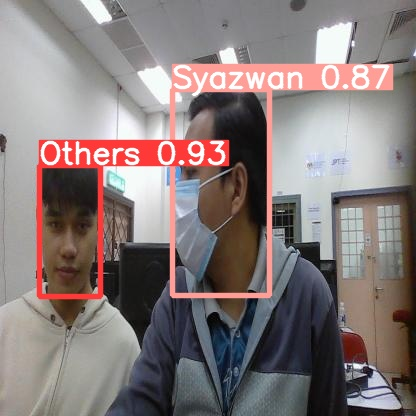

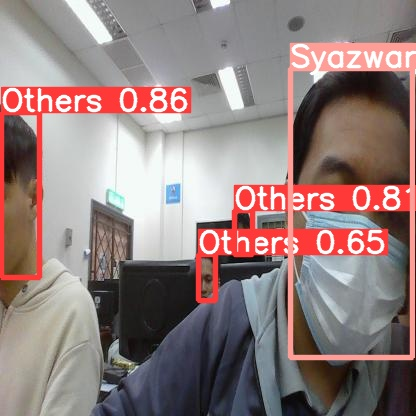

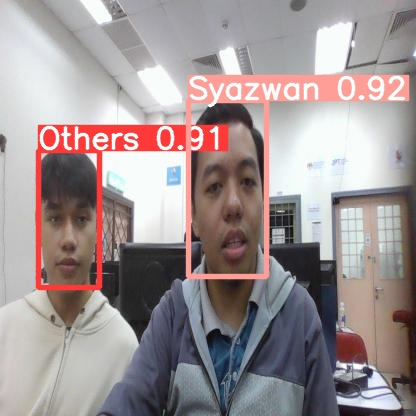

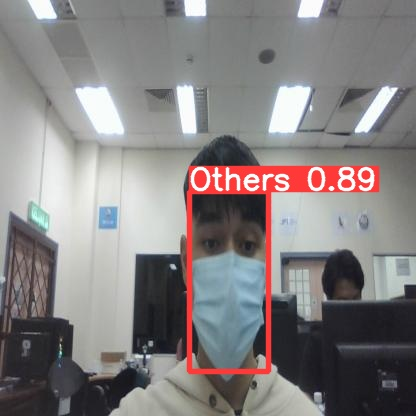

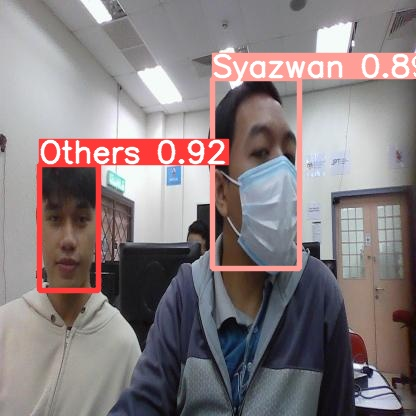

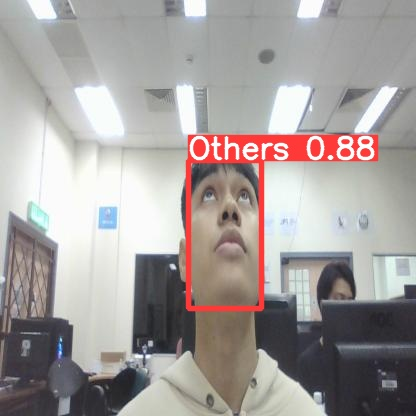

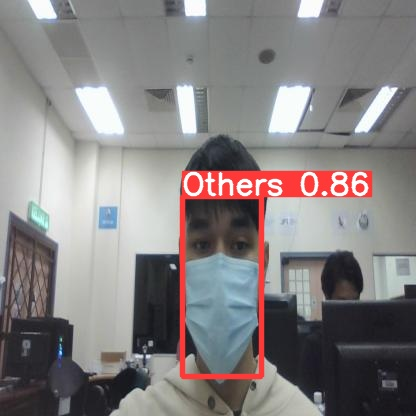

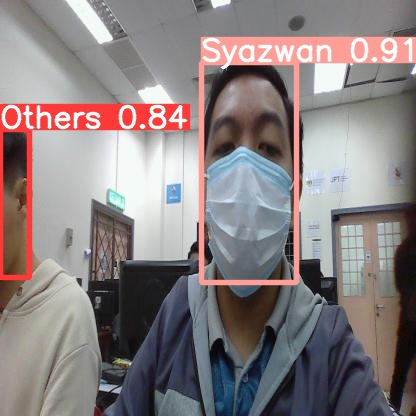

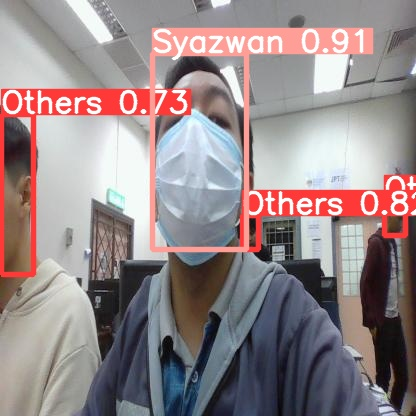

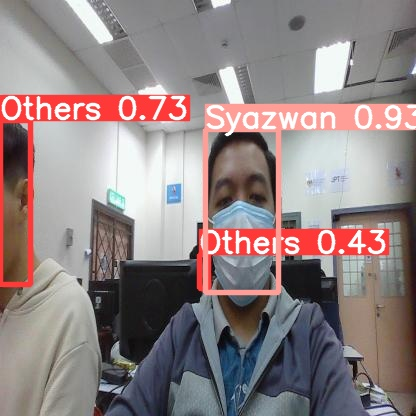

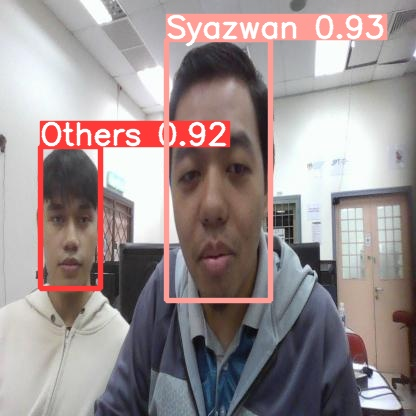

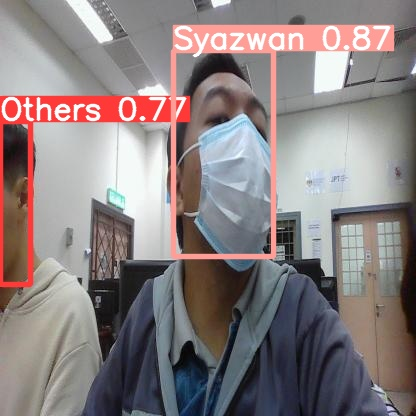

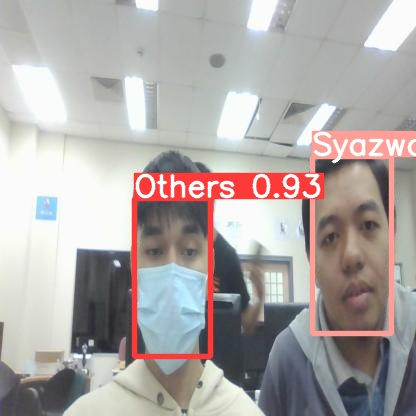

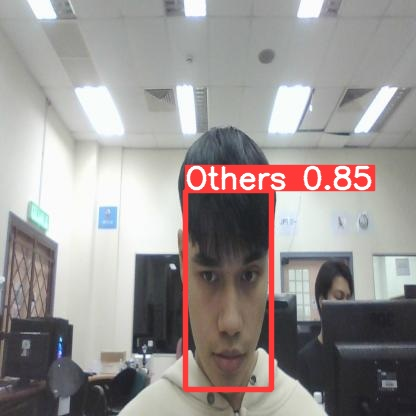

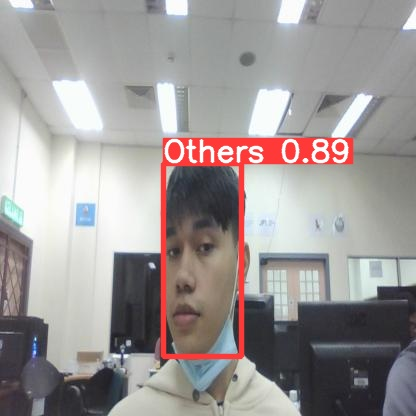

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cp /content/yolov5/runs/train/exp/weights/best.pt /content/gdrive/MyDrive

**Click here to get the model and video for inference**

[Inference Video](https://drive.google.com/file/d/1SSPQr-3X6RBYPZaZ59ijLi2rf26UoucW/view?usp=sharing)

[Model](https://drive.google.com/file/d/1je2FpvQ6CTLej2G4g44MB39EWjoWSTxJ/view?usp=sharing)
